In [1]:
import os.path
import sys

import os

# Récupère le chemin d'accès parent de sys.path[0]
parent_dir = os.path.dirname(sys.path[0])

sys.path.append(os.path.abspath(parent_dir))
import importlib
import algorithmes
importlib.reload(algorithmes)
from algorithmes import *
import random
import mesa
import bisect

import gym
import numpy as np
import random
import tensorflow as tf
from collections import deque


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [3]:
def get_matrice_adjacence(route):
     

    # Extraire tous les arcs de la route
    arcs_voiture = set()
    for sous_route in route:
        sous_route = [-1]+sous_route+[-1]
        arcs_voiture.update(set(zip(sous_route, sous_route[1:])))

    # Initialiser la matrice d'adjacence avec des zéros
    n = max(list(itertools.chain.from_iterable(route)))+2
    matrice_adj = [[0]*n for _ in range(n)]

    # Mettre à jour les valeurs correspondantes à chaque arc
    for i, j in arcs_voiture:
        matrice_adj[i+1][j+1] = 1
        #matrice_adj[i+1][j+1] = matrice_temps_Cij[i][j]
        
        
    
    return(np.array(matrice_adj))

In [4]:
route = [[0,1,2,3,4],[8,6,7],[5,9]]

get_matrice_adjacence(route)

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

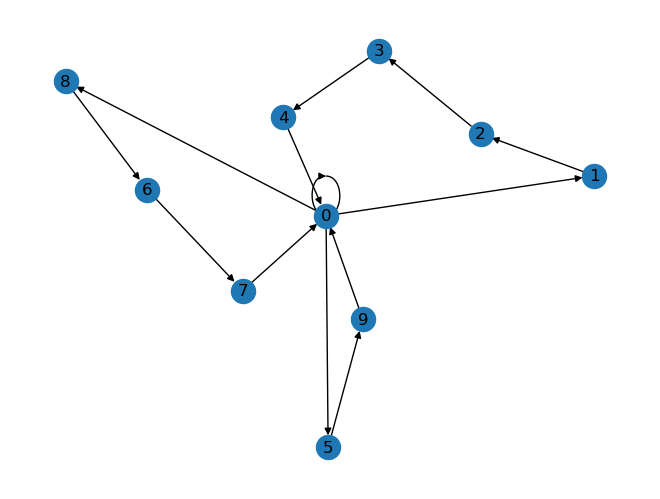

In [6]:
import networkx as nx
arcs_voiture = set()
for sous_route in route:
    sous_route = [0]+sous_route+[0]
    arcs_voiture.update(set(zip(sous_route, sous_route[1:])))
# Define the edges in the graph
edges = arcs_voiture

# Create a directed graph from the edge list
G = nx.DiGraph(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [7]:
def get_solution_random(nombre_client):
    list_client =  [i for i in range(nombre_client)]
    random.shuffle(list_client)
    solution = get_route_version2(list_client,time_window,Q)
    return(solution)

## utiliser fonction cout pour calculer le cout d'une fonction

In [8]:
def plot_routes(Solution, pos):
    arcs_voiture = set()
    for sous_route in Solution:
        sous_route = ["dp"]+sous_route+["dp"]
        arcs_voiture.update(set(zip(sous_route, sous_route[1:])))

    # Define the edges in the graph
    edges = arcs_voiture

    # Create a directed graph from the edge list
    G = nx.DiGraph(edges)


    nx.draw(G, pos, with_labels=True)
    plt.show()

In [9]:
nombre_clients = 10
Sol_init = get_solution_random(nombre_client)

In [10]:
def get_voisinage(i,route):
    route_out = []
    if i==nombre_client-1:
        route_out =route
    else:
        G= list(itertools.chain.from_iterable(route))
        G[i],G[i+1] = G[i+1],G[i]
        route_out = get_route_version2(G,time_window,Q)
    return route_out

In [11]:
import time
from IPython.display import clear_output

# Specify fixed positions for the nodes
pos = {i: (random.random(), random.random()) for i in ["dp"]+[i for i in range(15)]}
pos['dp'] = (0.5,0.5)
plot_routes(route, pos)
for i in range(14):
    clear_output(wait=True)
    
    plot_routes(get_voisinage(i,route),pos)

    time.sleep(1)

IndexError: list index out of range

In [ ]:
import gym
from gym import spaces
import numpy as np
n = nombre_client + 1

class DQNEnv(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Box(low=0, high=1, shape=(1,n*n))
        self.action_space = spaces.Discrete(nombre_client)
        self.state = np.array(get_matrice_adjacence(Sol_init)).reshape(n*n,)
        self.state_routes = Sol_init
        self.num_iterations = 100
        self.done = False
        
        self.pos = {i: (random.random(), random.random()) for i in ["dp"]+[i for i in range(n)]}
        self.pos['dp'] = (0.5,0.5)

    def reset(self):
        self.state = np.array(get_matrice_adjacence(Sol_init)).reshape(n*n,)
        self.state_routes = Sol_init
        self.done = False
        self.num_iterations = 100
        return self.state

    def step(self, action):
        
        #reward = cout(self.state_routes)
        self.state_routes = get_voisinage(action, self.state_routes)
        self.num_iterations-=1
        #reward =reward - cout(self.state_routes)
        reward = cout(Sol_init) - cout(self.state_routes)
        self.state = np.array(get_matrice_adjacence(self.state_routes)).reshape(n*n,)
        
        if self.num_iterations==0:
            self.done = True
        else:
            self.done = False
        return self.state, reward, self.done, {}
        
    def render(self):
        
        clear_output()
    
        plot_routes(self.state_routes, self.pos)
        
        time.sleep(0.1)
        
        
        

        

        